## Laboratorio 3

### Parte 1. Numpy

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#¿Cuál es el tamaño en bytes de un array de 1000

array_booleano = np.zeros(1000, dtype=bool)
array_booleano[1::2] = True
tamano_bytes = array_booleano.nbytes

print(f"El tamaño en bytes del array es: {tamano_bytes}")

El tamaño en bytes del array es: 1000


In [18]:
#Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. 
#Muestre los 10 últimos por pantalla

array_pares = np.arange(100, 0, -2)
print(f"Los últimos 10 elementos son: {array_pares[-10:]}")

Los últimos 10 elementos son: [20 18 16 14 12 10  8  6  4  2]


In [53]:
#Dado el array (2456 0374 8852 1561) 

array3 = np.array([[2,4,5,6],[0,3,7,4],[8,8,5,2],[1,5,6,1]])
print(array3)
#Seleccione con una instrucción el subarray de elementos:
# 0374

print(array3[1])

#Después, seleccione el subarray de elementos
#2, 5, 8, 5

print("Valores:", array3[0, 0], array3[0, 2], array3[2, 0], array3[3, 1])

[[2 4 5 6]
 [0 3 7 4]
 [8 8 5 2]
 [1 5 6 1]]
[0 3 7 4]
Valores: 2 5 8 5


In [60]:
#Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])
print(a, b)

diferencia = a - b
media = np.mean(diferencia)
print(f"La media aritmética de la diferencia es: {media}")

[1 4 2 7] [1 3 2 9]
La media aritmética de la diferencia es: -0.25


In [19]:
#Tengo valores de cordenadas (x, y) en las columnas del array
#1.33 4.5
#30.0 10.7
#70.2 0.5
# Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.

array4 = np.array([[1.33, 4.5],[30.0, 10.7],[70.2, 0.5]])

nuevas_coo = np.array([[37.1, -3.6]])
nuevo_array = np.concatenate((array4, nuevas_coo), axis=0)

print(nuevo_array)
nuevo_array.shape

[[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]]


(4, 2)

In [23]:
#Copie el array del ejercicio anterior. 
#Traspóngalo (.Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0)

array_transpuesto = nuevo_array.T
nuevas_coo2 = np.array([[10.8, 3.0], [35.8, 12.0]])
array_transpuesto = np.concatenate((array_transpuesto, nuevas_coo2), axis=1)

print(array_transpuesto)


[[ 1.33 30.   70.2  37.1  10.8   3.  ]
 [ 4.5  10.7   0.5  -3.6  35.8  12.  ]]


### Parte 2. Exploración y minería de datos

In [212]:
dataset = pd.read_csv("./NucleosPoblacion.csv", delimiter=',') 
dataset.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


In [104]:
dataset.dtypes

FID            int64
OBJECTID       int64
Texto         object
Poblacion      int64
CodMun         int64
Municipio     object
CodProvin      int64
Provincia     object
X            float64
Y            float64
dtype: object

In [31]:
# ¿Cuántos Municipios tienen más de 100000 habitantes?.
 
resultado1 = dataset[dataset['Poblacion'] > 100000]
cantidad1 = len(resultado1['Municipio'].unique())
print(f"Hay {cantidad1} municipios con mas de 100,000 habitantes")

Hay 62 municipios con mas de 100,000 habitantes


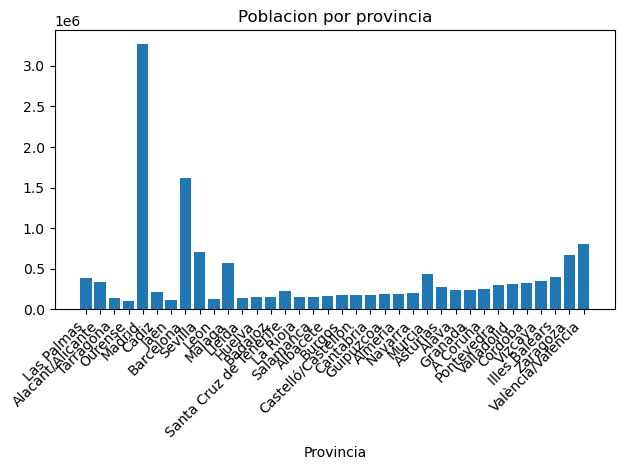

La ciudad Granada se encuentra en la posición 273


In [70]:
#Realice una gráfica de barras sobre la población de cada ciudad, ordenela de menor a mayor y responda:
# a. ¿Cuál es la segunda ciudad más poblada?
# b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

data_ordenada = resultado1.sort_values(by='Poblacion')

plt.bar(data_ordenada['Provincia'], data_ordenada['Poblacion'])
plt.xticks(rotation=45, ha='right')
plt.title("Poblacion por provincia")
plt.xlabel("Provincia") 
plt.tight_layout()
plt.show()

# a. La segunda ciudad más poblada es Barcelona.

#b. 
posicion_ciudad = data_ordenada[data_ordenada['Provincia'] == 'Granada'].index[0]
print(f"La ciudad Granada se encuentra en la posición {posicion_ciudad + 1}")

In [76]:
# ¿Cuántos municipios de Navarra tienen más de 5000 habitantes?

resultado2 = dataset[dataset['Provincia'] == 'Navarra']
resultado3 = resultado2[resultado2['Poblacion'] > 5000]

cantidad_navarra = len(resultado3['Municipio'].unique())
print(f"Hay {cantidad_navarra} municipios con mas de 5,000 habitantes en Navarra")

Hay 11 municipios con mas de 5,000 habitantes en Navarra


In [81]:
# ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). 
# Proporcione también la provincia a la que pertenece y su población.

data_ordenada_y = dataset.sort_values(by='Y', ascending=False)
data_ordenada_y.head()

#El municipio situado mas al norte es Viveiro, dentro de la Provincia de Lugo con poblacion de 16,211 habitantes.

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
104,104,105,Viveiro,16211.0,27066,Viveiro,27,Lugo,-7.588768,43.625578
447,447,448,Lluanco/Luanco,10788.0,33025,Gozón,33,Asturias,-5.792773,43.614030
443,443,444,Candás,11000.0,33014,Carreño,33,Asturias,-5.767181,43.590199
444,444,445,Piedrasblancas,22832.0,33016,Castrillón,33,Asturias,-5.973899,43.559984
442,442,443,Avilés,84202.0,33004,Avilés,33,Asturias,-5.924790,43.558577


In [94]:
# Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios 
# de la provincia de Granada.

resultado_granada = dataset[dataset['Provincia'] == 'Granada']

media_g = resultado_granada['Poblacion'].mean()
print(f"La media de población de los municipios de la provincia de Granada es: {media_g}")

mediana_g = resultado_granada['Poblacion'].median()
print(f"La mediana de la población de los municipios de la provincia de Granada es: {mediana_g}")

desv_est_g = resultado_granada['Poblacion'].std()
print(f"La desviación estándar de la población de los municipios de la provincia de Granada es: {desv_est_g}")

maximo_g = resultado_granada['Poblacion'].max()
print(f"El valor maximo de la población de los municipios de la provincia de Granada es: {maximo_g}")

minimo_g = resultado_granada['Poblacion'].min()
print(f"El valor minimo de la población de los municipios de la provincia de Granada es: {minimo_g}")

La media de población de los municipios de la provincia de Granada es: 30217.85
La mediana de la población de los municipios de la provincia de Granada es: 17526.0
La desviación estándar de la población de los municipios de la provincia de Granada es: 50355.49171459277
El valor maximo de la población de los municipios de la provincia de Granada es: 239154.0
El valor minimo de la población de los municipios de la provincia de Granada es: 10386.0


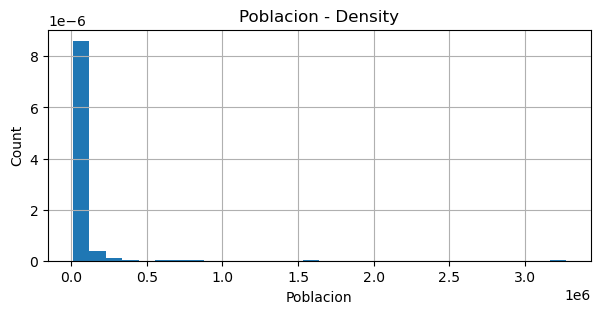

In [105]:
#Realice un histograma con la población de los Municipios para cada una de las provincias.

plt.figure(figsize=(7,3))
dataset['Poblacion'].hist(bins=30, density=True)
plt.title("Poblacion - Density")
plt.xlabel("Poblacion")
plt.ylabel("Count")
plt.show()

In [145]:
# Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. 
# ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?

data_muestra = dataset.loc[np.random.randint(0, len(dataset['Municipio'].unique()), 50), ['Poblacion', 'Municipio']]
cantidad_muestra = len(data_muestra['Municipio'].unique())
print(cantidad_muestra)


50


In [149]:
media_m = data_muestra['Poblacion'].mean()
print(f"La media de población de los municipios seleccionados al azar es: {media_m}")

desv_est_m = data_muestra['Poblacion'].std()
print(f"La desviación estándar de la población de los municipios seleccionados al azar es: {desv_est_m}")

La media de población de los municipios seleccionados al azar es: 32480.74
La desviación estándar de la población de los municipios seleccionados al azar es: 78243.52108740703


In [ ]:
# Determine los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia 
# en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

# Y = latitud y X = longitud

In [158]:
!pip install geopy

  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/9f/5a/a26132406f1f40cf51ea349a5f11b0a46cec02a2031ff82e391c2537247a/geographiclib-2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.9 MB/s eta 0:00:00


In [237]:
from geopy.distance import geodesic

latitud_madrid = -3.703797076
longitud_madrid = 40.4166300011

In [240]:
dataset_temp = dataset.drop(dataset[(dataset['Y'] == latitud_madrid) & (dataset['X'] == longitud_madrid)].index)

dataset_temp['Distancia'] = dataset_temp.apply(lambda row: geodesic((latitud_madrid, longitud_madrid), (row['Y'], row['X'])).kilometers, axis=1)

dataset_temp.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y,Distancia
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542,6926.706323
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966,6816.938055
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649,6798.133064
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496,6942.253026
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873,6955.462707


In [241]:
municipio_mas_cercano = dataset_temp.loc[dataset_temp['Distancia'].idxmin(), 'Municipio']
municipio_mas_lejano = dataset_temp.loc[dataset_temp['Distancia'].idxmax(), 'Municipio']

print("El municipio más cercano a Madrid es:", municipio_mas_cercano)
print("El municipio más lejano a Madrid es:", municipio_mas_lejano)

El municipio más cercano a Madrid es: Maó
El municipio más lejano a Madrid es: Los Llanos de Aridane
